<a href="https://colab.research.google.com/github/GitAd7/Machine-Learning/blob/main/ANN_Project_on_Handwritten_Digit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
data = keras.datasets.mnist

In [3]:
# Since the data contains images, it is not going to show any of it's content
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train, y_train), (X_test, y_test) = data.load_data()

# Exploratory Data Analysis

In [5]:
X_train.shape
# 60k images and 28 rows and columns

(60000, 28, 28)

In [6]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

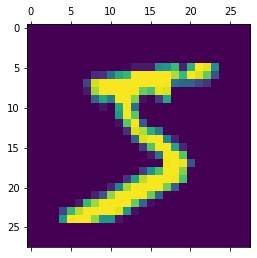

In [7]:
# This will give us the very first image.
plt.matshow(X_train[0])

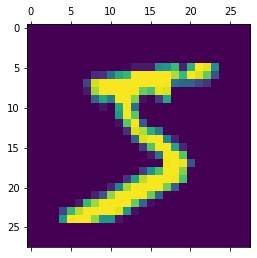

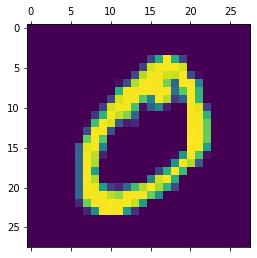

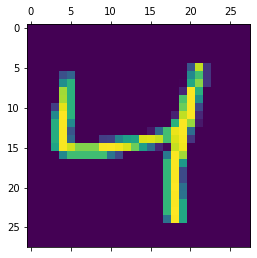

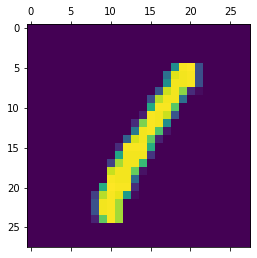

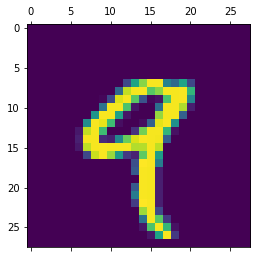

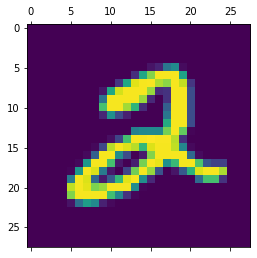

In [8]:
for i in range(6):
  plt.matshow(X_train[i]) 
# This is showing us the first 6 handwritten images of number 

In [9]:
# This shows that the data is 3 dimesional data.
X_test.shape

(10000, 28, 28)

In [10]:
y_train[:6]
# By this we have confirmed that the images showing numbers are correct.

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [11]:
# Flattening the X_train and X_test
flat_X_train = X_train.reshape(len(X_train), 28*28)
flat_X_test = X_test.reshape(len(X_test), 28*28) 

In [12]:
flat_X_train.shape

(60000, 784)

In [13]:
# Feature Selection
new_X_train = X_train/255
new_X_test = X_test/255
new_flat_X_train = new_X_train.reshape(len(new_X_train), 28*28)
new_flat_X_test = new_X_test.reshape(len(new_X_test), 28*28)

# Choosing the Model

In [14]:
model = keras.Sequential([
    keras.layers.Dense(units=100,
                       input_shape=(784,),
                       activation='sigmoid'),
    keras.layers.Dense(units=10,
                       activation='sigmoid')
])

model.compile(
    optimizer='Adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(new_flat_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4158 - accuracy: 0.8935
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2006 - accuracy: 0.9427
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1499 - accuracy: 0.9570
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1187 - accuracy: 0.9660
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9729


In [16]:
model.evaluate(new_flat_X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9681


[0.10285010933876038, 0.9681000113487244]

In [17]:
pred = model.predict(new_flat_X_test)

313/313 [==============================] - 0s 1ms/step


In [18]:
pred[0]

array([2.5160404e-02, 1.7702976e-02, 3.1405857e-01, 8.3644116e-01,
       4.5479907e-04, 6.1854869e-02, 3.4381814e-05, 9.9987411e-01,
       1.4964576e-02, 1.9950218e-01], dtype=float32)

In [19]:
# This give us the iteration with maximum accuracy
pred_label = [np.argmax(i) for i in pred]

In [20]:
#pred_label

In [21]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=pred_label)

Text(69.0, 0.5, 'Predicted value')

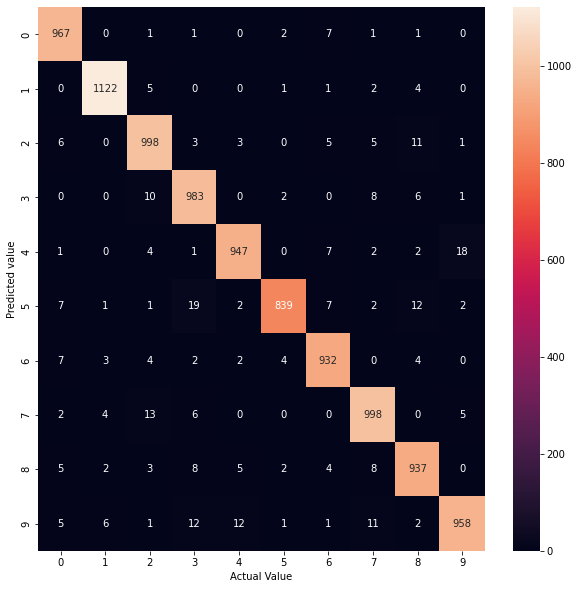

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')